In [1]:
import h3
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import pyproj
from shapely.ops import transform
from shapely.geometry import Polygon, MultiPolygon
from functools import partial
from src.utils import *

### Funkcje pomocnicze

In [23]:
import os

os.listdir('data')

['DEMOGRAPHY.geojson', 'NOISE.zip', 'DISTRICTS.zip', 'PARKS.zip']

In [3]:
def convert_to_wgs84(polygon):
    
    project = partial(
        pyproj.transform,
        pyproj.Proj(init = 'epsg:3857'),
        pyproj.Proj(init = 'epsg:4326')
    )
    polygon_wgs84 = transform(project, polygon)
    
    return polygon_wgs84

In [4]:
def h3df(polygon):
    wgs84 = convert_to_wgs84(polygon)
    if isinstance(wgs84, Polygon):
        outer = [(lat, lng) for lng, lat in wgs84.exterior.coords]
    poly = h3.LatLngPoly(outer)
    cells = h3.h3shape_to_cells(poly, 10)
    h3poly = list()
    for cell in cells:
        cell = [cell]
        hex_boundary = h3.cells_to_geo(cell)['coordinates'][0]
        hex_boundary_latlng = [(lat, lng) for lat, lng in hex_boundary]
        polygon = Polygon(hex_boundary_latlng)
        h3poly.append(polygon)
    
    gdf = gpd.GeoDataFrame({'geometry': h3poly}, crs = 'EPSG:4326')
    return gdf

/home/mweuro/venvy/spatial/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mweuro/venvy/spatial/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mweuro/venvy/spatial/lib/python3.10/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyp

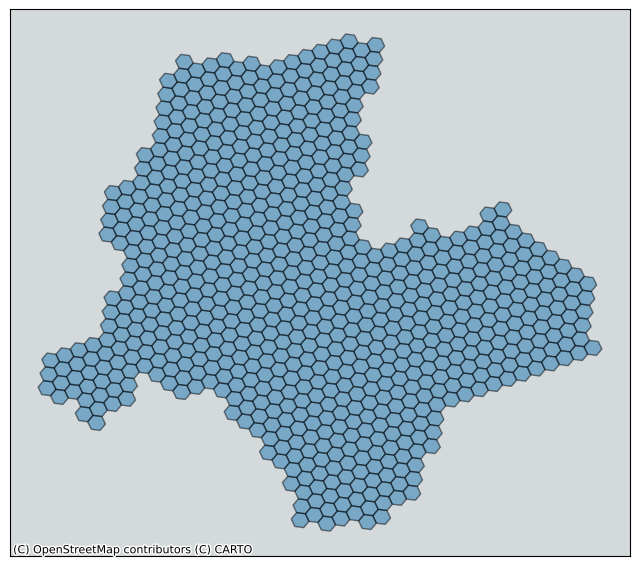

In [5]:
district1 = gpd.read_file('data/DISTRICTS.zip').head(1).geometry.iloc[0]
gdf = h3df(district1)
plot_df(gdf)

In [19]:
noise = gpd.read_file('data/NOISE.zip').iloc[3:5]
noise.geometry = noise.geometry.apply(convert_to_wgs84)
noise

/home/mweuro/venvy/spatial/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mweuro/venvy/spatial/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mweuro/venvy/spatial/lib/python3.10/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyp

,DB_LO,DB_HI,SHAPE_LEN,geometry
3,20.0,25.0,9.233291e+05,"MULTIPOLYGON (((-6.593 -9.249, -6.593 -9.249, ..."
4,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-6.593 -9.249, -6.593 -9.249, ..."


In [20]:
def filter_poligon(gdf, polygon):
    return gpd.overlay(gdf, polygon, how = 'intersection')

n = filter_poligon(noise, gdf)

/tmp/ipykernel_136042/1501019125.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:5514
Right CRS: EPSG:4326

  return gpd.overlay(gdf, polygon, how = 'intersection')


In [27]:
n

,DB_LO,DB_HI,SHAPE_LEN,geometry
0,20.0,25.0,9.233291e+05,"POLYGON ((-6.577 -9.266, -6.577 -9.266, -6.577..."
1,20.0,25.0,9.233291e+05,"POLYGON ((-6.607 -9.253, -6.607 -9.253, -6.607..."
2,20.0,25.0,9.233291e+05,"POLYGON ((-6.58 -9.264, -6.58 -9.264, -6.58 -9..."
3,20.0,25.0,9.233291e+05,"POLYGON ((-6.592 -9.262, -6.592 -9.262, -6.592..."
4,20.0,25.0,9.233291e+05,"POLYGON ((-6.602 -9.259, -6.602 -9.259, -6.602..."
...,...,...,...,...
152,25.0,30.0,1.016043e+06,"POLYGON ((-6.601 -9.278, -6.601 -9.278, -6.601..."
153,25.0,30.0,1.016043e+06,"POLYGON ((-6.605 -9.273, -6.605 -9.273, -6.605..."
154,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-6.594 -9.278, -6.594 -9.278, ..."
155,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-6.602 -9.273, -6.602 -9.273, ..."


In [28]:
gdf

,geometry
0,"POLYGON ((-6.60019 -9.27214, -6.59992 -9.27271..."
1,"POLYGON ((-6.59513 -9.26002, -6.59445 -9.2601,..."
2,"POLYGON ((-6.58973 -9.27937, -6.58932 -9.27889..."
3,"POLYGON ((-6.60428 -9.27161, -6.60401 -9.27218..."
4,"POLYGON ((-6.58589 -9.26602, -6.58548 -9.26554..."
...,...
745,"POLYGON ((-6.59459 -9.26382, -6.59391 -9.2639,..."
746,"POLYGON ((-6.59477 -9.27818, -6.59545 -9.27809..."
747,"POLYGON ((-6.57706 -9.2725, -6.57733 -9.27193,..."
748,"POLYGON ((-6.61504 -9.27447, -6.61477 -9.27504..."


<Axes: >

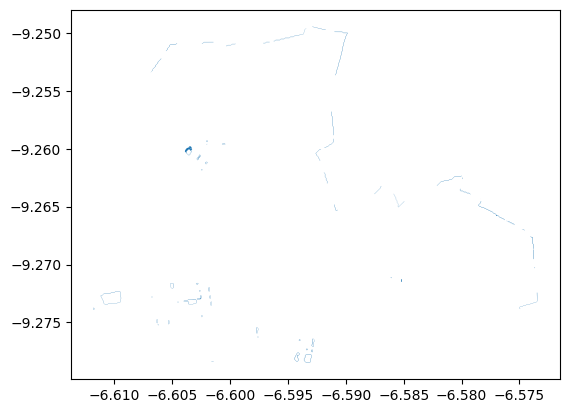

In [22]:
n.plot()